In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('inferences.csv', sep=',', index_col=0)
noises = df['NOISE'].drop_duplicates().tolist()
datasets = df['DATASET'].drop_duplicates().tolist()
models = df['MODEL'].drop_duplicates().tolist()
df

,NOISE,DATASET,MODEL,ERR_AVG,ERR_STD,ERR_MAX,ERR_MIN,LOG_STD
0,0.0,SIMULATION_30_40,FF_32000,1.819634,0.212823,2.032457,1.606811,0.117497
1,0.0,SIMULATION_30_40,FF_64000,1.870250,0.130767,2.001017,1.739483,0.070034
2,0.0,SIMULATION_30_40,FF_128000,1.374251,0.415423,1.789675,0.958828,0.312039
3,0.0,SIMULATION_30_40,PIDNN_32000,0.003827,0.001571,0.005398,0.002256,0.436364
4,0.0,SIMULATION_30_40,PIDNN_64000,0.006247,0.001760,0.008007,0.004487,0.289565
5,0.0,SIMULATION_30_40,PIDNN_128000,0.009232,0.002248,0.011480,0.006984,0.248468
6,0.0,SIMULATION_80_90,FF_32000,1.080860,0.018835,1.099695,1.062026,0.017427
7,0.0,SIMULATION_80_90,FF_64000,1.120634,0.076813,1.197447,1.043820,0.068652
8,0.0,SIMULATION_80_90,FF_128000,1.146733,0.083332,1.230065,1.063401,0.072797
9,0.0,SIMULATION_80_90,PIDNN_32000,0.034979,0.001830,0.036810,0.033149,0.052377


In [5]:
def plot_setup(dimr, dimc, xlabel, suptitle, ylim, hide_last=False):
    fig, axs = plt.subplots(dimr, dimc, sharey=True)
    fig.set_size_inches(18.5, 10.5)
    fig.set_dpi(100)
    plt.ylim(-2, ylim)  
    fig.suptitle(suptitle, fontsize=24)
    for ax in axs.flat:
        ax.set(xlabel=xlabel, ylabel='-log(relative MSE)')
        ax.label_outer()
        ax.spines["top"].set_visible(False)  
        ax.spines["right"].set_visible(False)  
        ax.get_xaxis().tick_bottom()  
        ax.get_yaxis().tick_left() 
        ax.xaxis.set_tick_params(labelbottom=True)
        ax.yaxis.set_tick_params(labelleft=True)
    if hide_last: axs.flat[-1].set_visible(False)
    return fig, axs

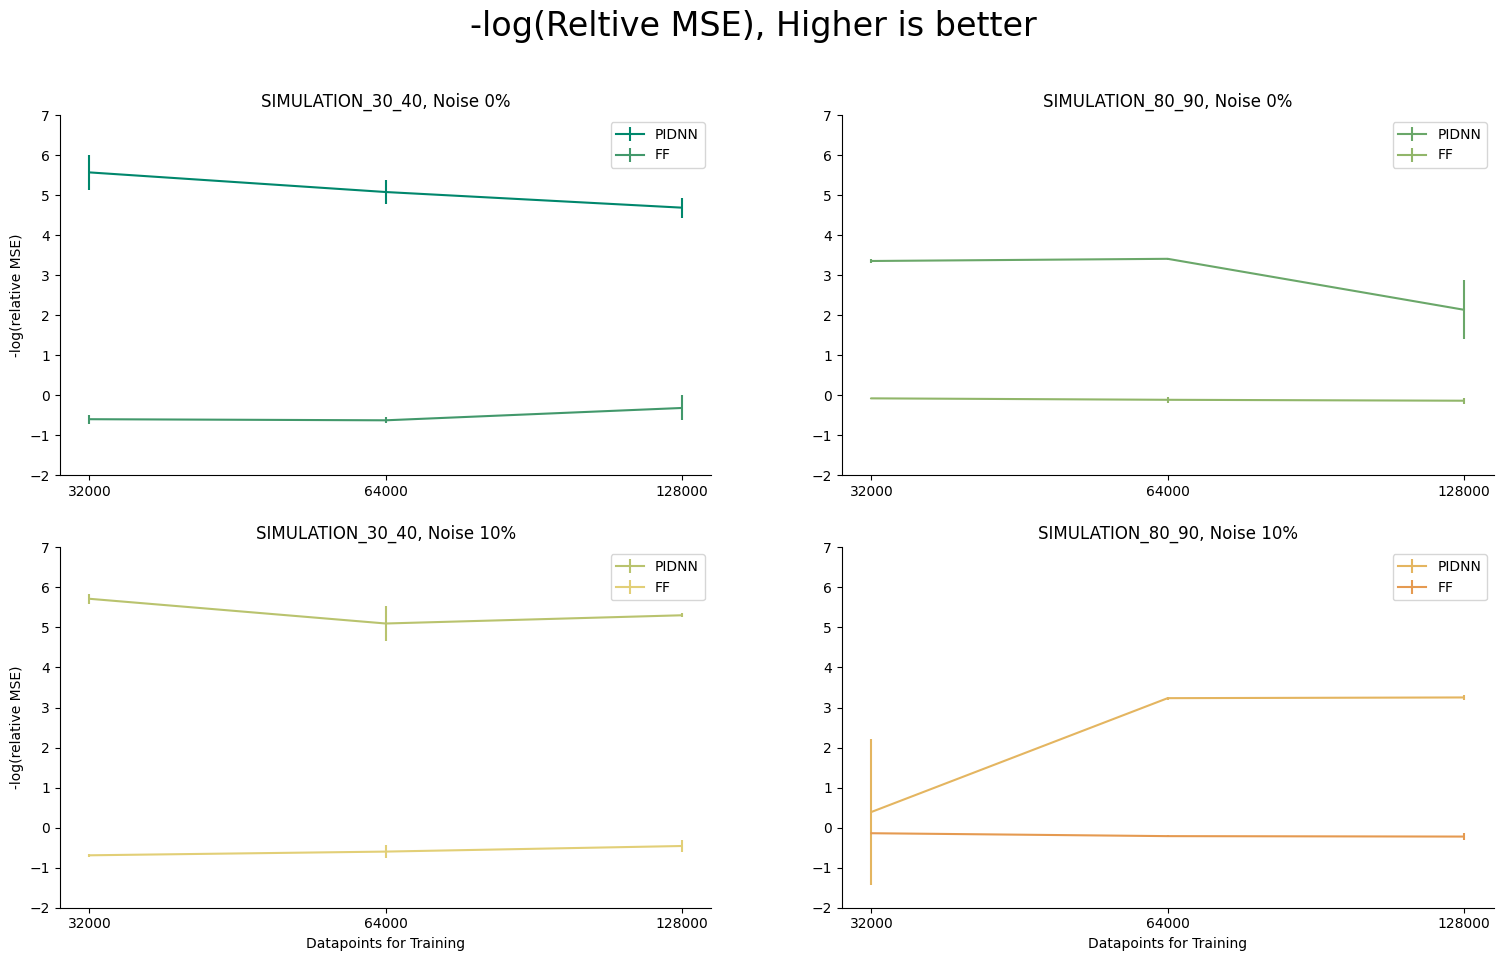

In [7]:
colors = ["#00876c","#42986b","#6aa769","#91b66a","#b9c36e","#e2cf77","#e4b560","#e59a51","#e37d4a","#de5e4b","#d43d51"]

fig, axs = plot_setup(2, 2, xlabel='Datapoints for Training', suptitle=f'-log(Reltive MSE), Higher is better', ylim=7)
color_iter = 0

for indr, noise in enumerate(noises):
    for indc, dataset in enumerate(datasets):
        rdf = df.loc[(df['NOISE'] == noise) & (df['DATASET'] == dataset)]

        x = [s.split('_')[-1] for s in rdf['MODEL'].tolist()]

        for nn in ['PIDNN','FF']:
            y = np.array(rdf.loc[rdf['MODEL'].str.startswith(nn), 'ERR_AVG'].tolist())
            yerr = np.array(rdf.loc[rdf['MODEL'].str.startswith(nn), 'LOG_STD'].tolist())

            axs[indr, indc].errorbar(x[:y.shape[0]], -np.log(y), yerr = yerr,
                        label =nn, color=colors[color_iter])
            color_iter = (color_iter + 1)%len(colors)
        
        axs[indr, indc].legend(loc ='upper right')

        axs[indr, indc].set_title(f'{dataset}, Noise {int(100*noise)}%')
fig.show()

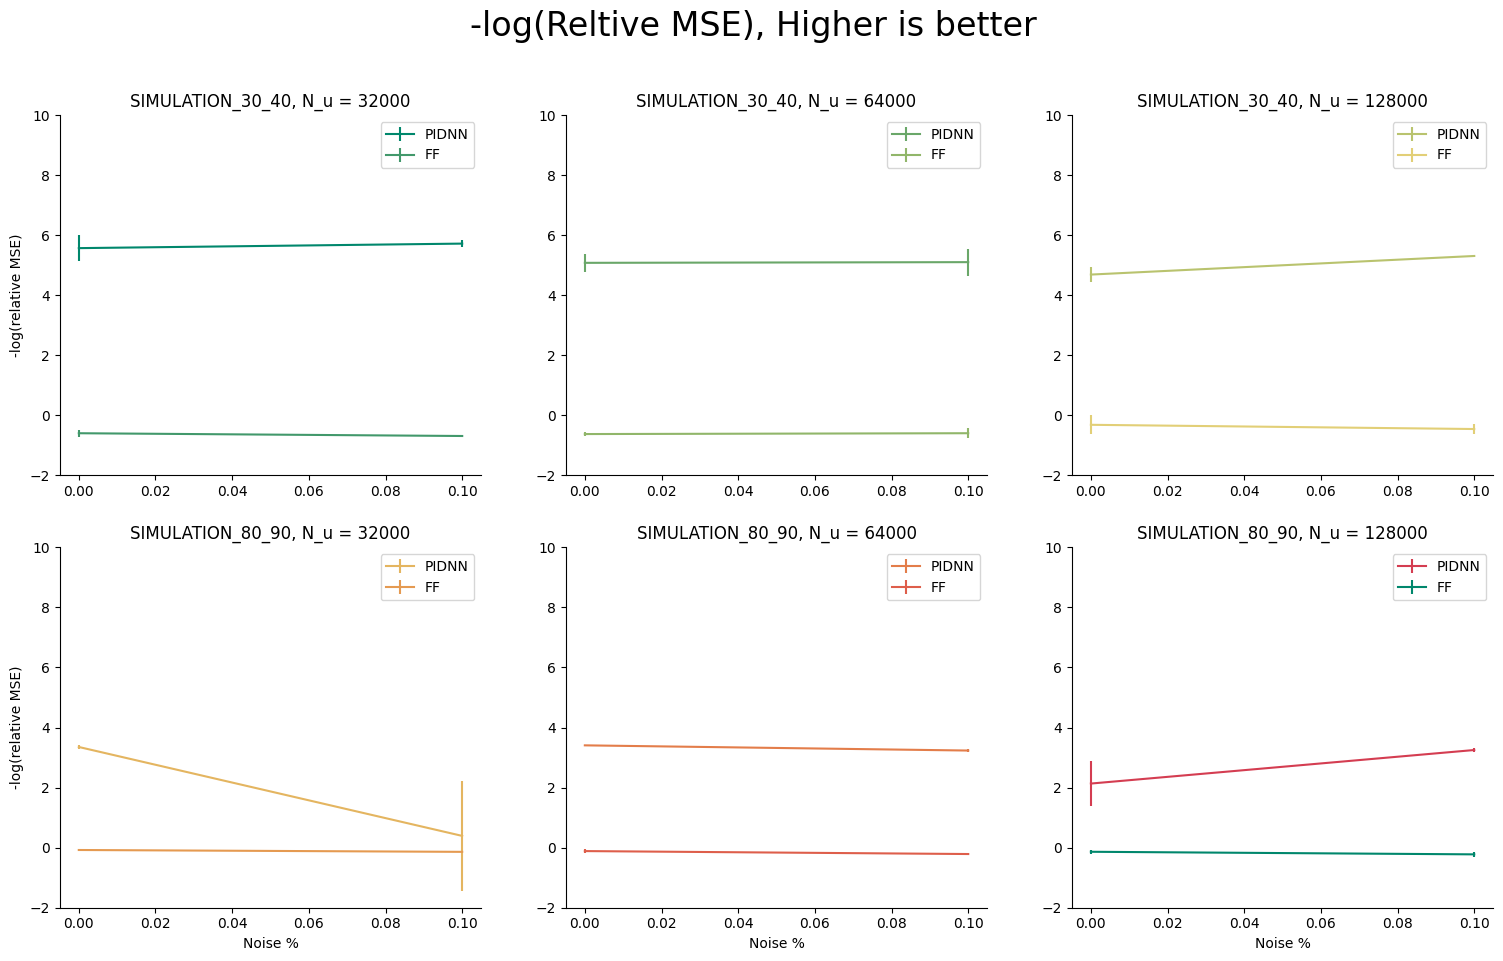

In [12]:
colors = ["#00876c","#42986b","#6aa769","#91b66a","#b9c36e","#e2cf77","#e4b560","#e59a51","#e37d4a","#de5e4b","#d43d51"]
possible_Nu = list(set([int(s.split('_')[-1]) for s in models]))
possible_Nu.sort() # N_u = number of data points
possible_Nu = [str(s) for s in possible_Nu]

color_iter = 0

fig, axs = plot_setup(2, 3, xlabel='Noise %', suptitle=f'-log(Reltive MSE), Higher is better', ylim=10)

for indr, dataset in enumerate(datasets):
    for indc, Nu in enumerate(possible_Nu):
        rdf = df.loc[(df['DATASET'] == dataset) & (df['MODEL'].str.endswith(Nu))]
        x = noises

        for nn in ['PIDNN','FF']:
            y = np.array(rdf.loc[rdf['MODEL'].str.startswith(nn), 'ERR_AVG'].tolist())
            yerr = np.array(rdf.loc[rdf['MODEL'].str.startswith(nn), 'LOG_STD'].tolist())

            axs[indr][indc].errorbar(x[:y.shape[0]], -np.log(y), yerr = yerr,
                        label =nn, color=colors[color_iter])
            color_iter = (color_iter + 1)%len(colors)
        
        axs[indr][indc].legend(loc ='upper right')
        axs[indr][indc].set_title(f'{dataset}, N_u = {Nu}')

fig.show()